# Marco and Financial Economertics  Lab Problem Week4 
### Thomas Yang and Jianhua Mei

The file Merck.csv contains daily data of stock prices of Merck & Co., Inc. (MRK) during 2001-2013. In what follows, we use yt to denote the adjusted closing prices (adjclose in the data) in time t.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore')
from statsmodels.stats.diagnostic import acorr_ljungbox

#### a) Load the data to Python, generate a date variable, declare the data as time series, and keep only observations during January 1, 2011 - January 31, 2012.

In [13]:
data = pd.read_csv('Merck.csv')
# Keep observation during January 1,2011 - January 31, 2012
# Transfer date format Y-m-d to datetime
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')
data = data[(data.Date < '20120131') & (data.Date > '20110101')].reset_index(drop = True)

In [12]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,delta_y,Log_return
0,2011-01-03,36.290001,36.779999,35.990002,36.040001,27.455187,19559500,NaN,NaN
1,2011-01-04,36.240002,36.400002,35.849998,36.349998,27.691328,13926100,0.236141,0.008564
2,2011-01-05,36.040001,36.580002,36.000000,36.560001,27.851322,14520300,0.159994,0.005761
3,2011-01-06,36.560001,37.139999,36.560001,37.060001,28.232212,11990300,0.380890,0.013583
4,2011-01-07,37.169998,37.349998,36.860001,37.349998,28.453135,12753500,0.220923,0.007795
...,...,...,...,...,...,...,...,...,...
266,2012-01-24,38.970001,39.209999,38.650002,38.779999,30.941633,13144700,0.007971,0.000258
267,2012-01-25,38.570000,38.790001,38.259998,38.680000,30.861845,14475200,-0.079788,-0.002582
268,2012-01-26,38.840000,38.950001,38.540001,38.779999,30.941633,12388800,0.079788,0.002582
269,2012-01-27,38.730000,38.799999,38.220001,38.520000,30.734186,12120600,-0.207447,-0.006727


#### b) Construct the following variables:

Changes in prices: ∆yt = yt − yt−1

Log returns: rt = log(yt/yt−1)

In [14]:
data['delta_y'] = data['Adj Close'].diff()
data['Log_return'] = np.log(data['Adj Close']).diff()
data = data.dropna()
data = data.reset_index(drop = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume,delta_y,Log_return
0,2011-01-04,36.240002,36.400002,35.849998,36.349998,27.691328,13926100,0.236141,0.008564
1,2011-01-05,36.040001,36.580002,36.000000,36.560001,27.851322,14520300,0.159994,0.005761
2,2011-01-06,36.560001,37.139999,36.560001,37.060001,28.232212,11990300,0.380890,0.013583
3,2011-01-07,37.169998,37.349998,36.860001,37.349998,28.453135,12753500,0.220923,0.007795
4,2011-01-10,37.259998,37.619999,37.160000,37.200001,28.338865,10723700,-0.114270,-0.004024
...,...,...,...,...,...,...,...,...,...
265,2012-01-24,38.970001,39.209999,38.650002,38.779999,30.941633,13144700,0.007971,0.000258
266,2012-01-25,38.570000,38.790001,38.259998,38.680000,30.861845,14475200,-0.079788,-0.002582
267,2012-01-26,38.840000,38.950001,38.540001,38.779999,30.941633,12388800,0.079788,0.002582
268,2012-01-27,38.730000,38.799999,38.220001,38.520000,30.734186,12120600,-0.207447,-0.006727


In [15]:
data_train = data[(data.Date < '20111231') & (data.Date > '20110101')].reset_index(drop = True).reset_index(drop = True)
data_train

,Date,Open,High,Low,Close,Adj Close,Volume,delta_y,Log_return
0,2011-01-04,36.240002,36.400002,35.849998,36.349998,27.691328,13926100,0.236141,0.008564
1,2011-01-05,36.040001,36.580002,36.000000,36.560001,27.851322,14520300,0.159994,0.005761
2,2011-01-06,36.560001,37.139999,36.560001,37.060001,28.232212,11990300,0.380890,0.013583
3,2011-01-07,37.169998,37.349998,36.860001,37.349998,28.453135,12753500,0.220923,0.007795
4,2011-01-10,37.259998,37.619999,37.160000,37.200001,28.338865,10723700,-0.114270,-0.004024
...,...,...,...,...,...,...,...,...,...
246,2011-12-23,37.680000,37.900002,37.639999,37.900002,30.239506,9550100,0.271281,0.009012
247,2011-12-27,37.779999,37.900002,37.709999,37.750000,30.119818,7564300,-0.119688,-0.003966
248,2011-12-28,37.689999,37.799999,37.400002,37.430000,29.864500,7275200,-0.255318,-0.008513
249,2011-12-29,37.599998,37.750000,37.490002,37.730000,30.103863,6860600,0.239363,0.007983


#### c) Draw time series plots of yt and ∆yt and comment on their stationarity

<Figure size 1500x600 with 0 Axes>

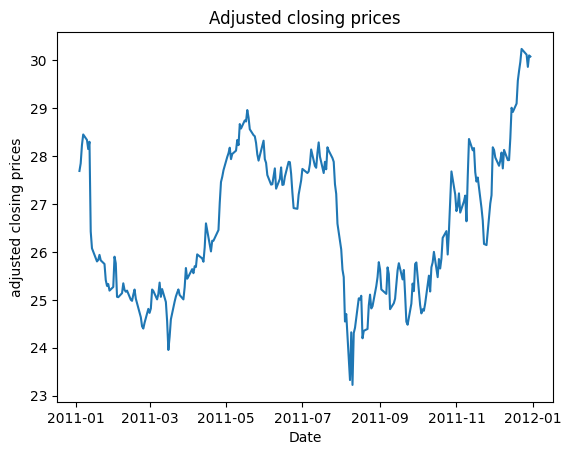

<Figure size 1500x600 with 0 Axes>

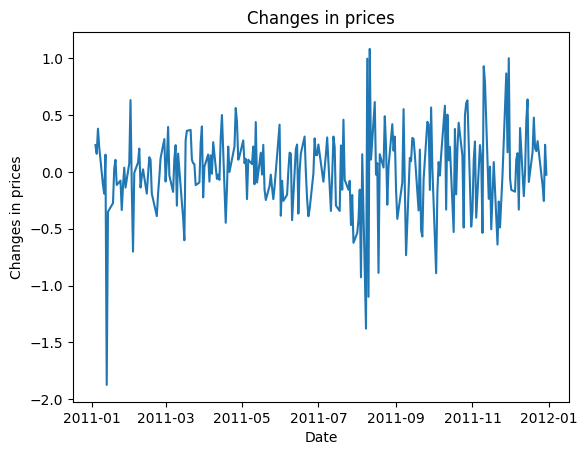

In [49]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
plt.plot(data_train.Date, data_train['Adj Close'])

# 
plt.title('Adjusted closing prices')
plt.xlabel('Date')
plt.ylabel('adjusted closing prices')

# 
plt.show()
#%%
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
plt.plot(data_train.Date, data_train.delta_y)

# 
plt.title('Changes in prices')
plt.xlabel('Date')
plt.ylabel('Changes in prices')

# 
plt.show()

#### (d) Compute and plot (using either ac/pac or corrgram) ACF and PACF of $y_{t}$ and $ \Delta y_{t} $ Comment on your findings.

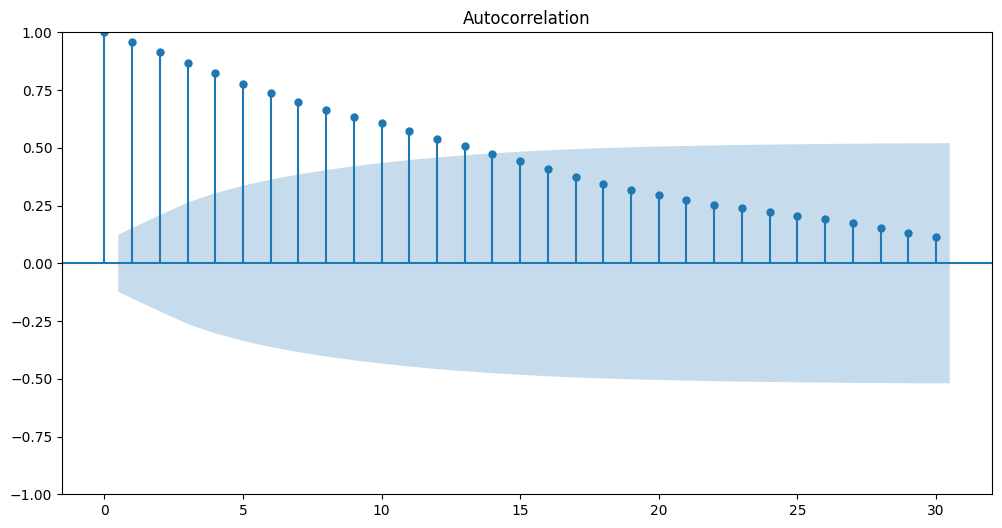

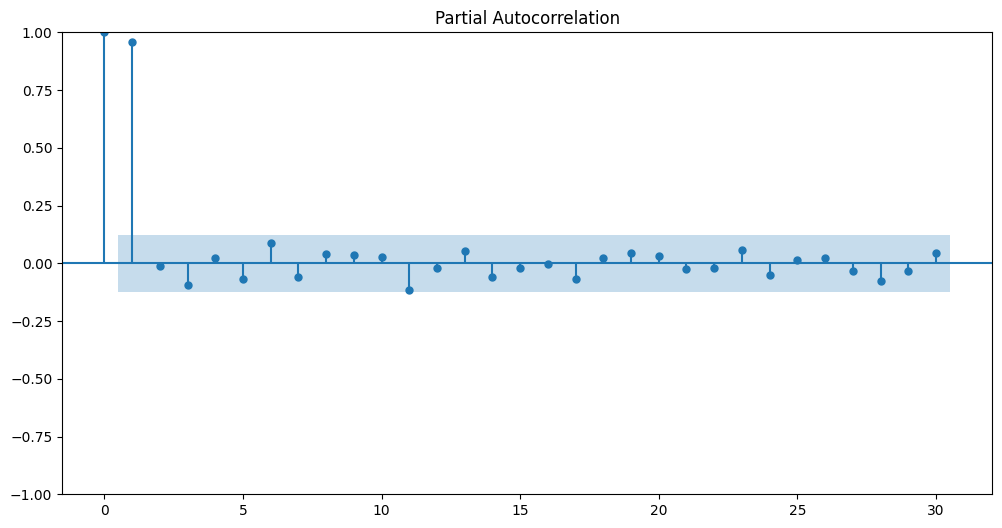

In [45]:
ts = data_train['Adj Close']
  
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=30, ax=ax)
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(ts.values.squeeze(), lags=30, ax=ax)
plt.show()

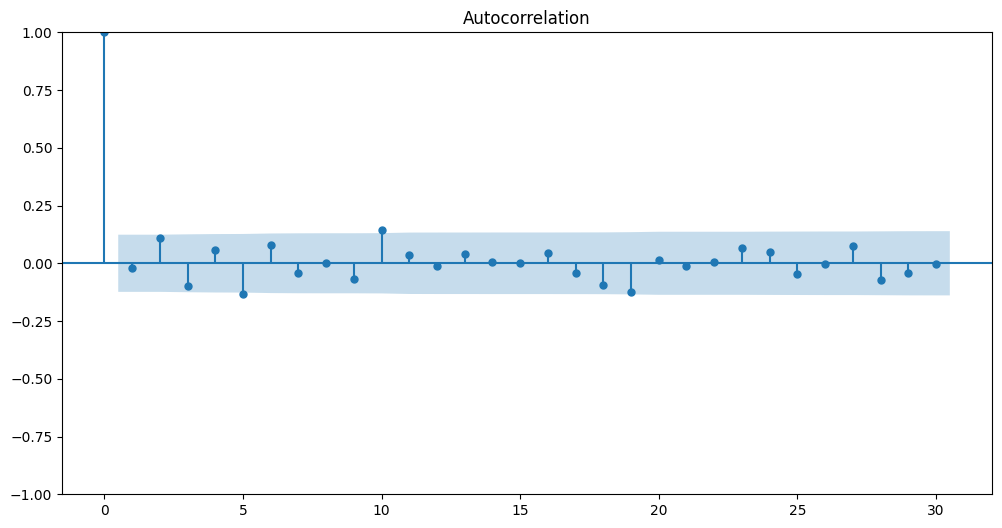

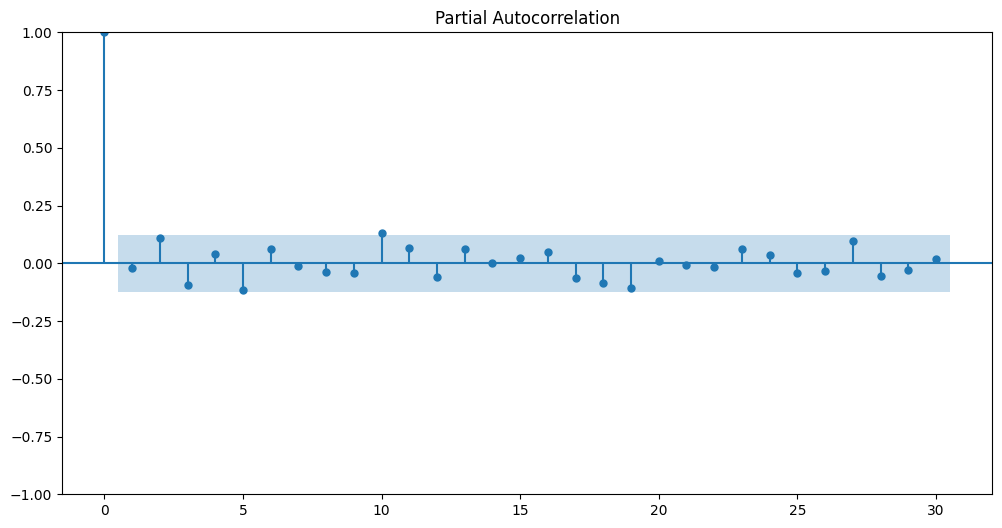

In [46]:
ts = data_train['delta_y']
  
# Plot ACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=30, ax=ax)
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(ts.values.squeeze(), lags=30, ax=ax)
plt.show()

Comment on your findings:

For $\{y_{t}\}$, $\rho_1 \approx 1 $ and $\rho_k$ decays very slowly as k increases, and the PACF has only 1 peak whose value is approximately 1. This pattern of ACF and PACF implies that $y_{t}$ may have unit root, i.e., $y_{t} ∼ AR(1)$ with $a_1 \approx 1 $ . We know that the sufficient and necessary condition for an AR(1) model to be stationary is $|a_1| < 1$. Thus, we doubt that $\{y_{t}\}$ is not a stationary process.

For $\{\Delta y_{t}\}$, we can observe a couple of significant (but small) ACF and PACF for comparatively large k (order of lags). There are no clear cut-off points for either ACF or PACF, which suggests that
an ARMA process rather than either AR or MA is more suitable for modeling $\{\Delta y_{t}\}$.

####  (e) Based on the ACF and PACF of $\{\Delta y_{t}\}$ you obtained in (d), propose and estimate at leastthree ARMA(p, q) models for $\{\Delta y_{t}\}$. 

Following the parsimony principle, we try ARMA models with order (1, 1), (1, 2), (2, 1), (2, 2) and compute their AIC/BIC. 

In [27]:
ts = data_train['delta_y']

In [28]:
#%% ARMA(1,1) Model
p = 1
q = 1
from statsmodels.tsa.arima_model import ARMA
model1 =  sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()        

print('ARMA(1,1) Model aic:', model1.aic) 
print('ARMA(1,1) Model bic:', model1.bic)

#%% ARMA(1,2) Model
p = 1
q = 2

model2 = sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()          

print('ARMA(1,2) Model aic:', model2.aic) 
print('ARMA(1,2) Model bic:', model2.bic)

#%% ARMA(2,1) Model
p = 2
q = 1

model3 = sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()          

print('ARMA(2,1) Model aic:', model3.aic) 
print('ARMA(2,1) Model bic:', model3.bic)

#%% ARMA(2,2) Model
p = 2
q = 2

model4 = sm.tsa.ARIMA(ts, order=(p, 0, q)).fit()          

print('ARMA(2,2) Model aic:', model4.aic) 
print('ARMA(2,2) Model bic:', model4.bic)

ARMA(1,1) Model aic: 212.99809726468163
ARMA(1,1) Model bic: 227.09990902120876
ARMA(1,2) Model aic: 212.76296783848665
ARMA(1,2) Model bic: 230.39023253414555
ARMA(2,1) Model aic: 212.83576675728042
ARMA(2,1) Model bic: 230.46303145293933
ARMA(2,2) Model aic: 223.29402486902023
ARMA(2,2) Model bic: 244.44674250381092


In [29]:
print('ARMA(1,1) Model Summary:', model1.summary())

ARMA(1,1) Model Summary:                                SARIMAX Results                                
Dep. Variable:                delta_y   No. Observations:                  251
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -102.499
Date:                Tue, 15 Aug 2023   AIC                            212.998
Time:                        01:58:34   BIC                            227.100
Sample:                             0   HQIC                           218.673
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.023      0.445      0.656      -0.035       0.056
ar.L1         -0.9083      0.089    -10.242      0.000      -1.082      -0.734
ma.L1          0.8412      

#### f) Use AIC and BIC to select an ARMA(p, q) model. Estimate the AR and MA parameters of this model and report estimation results

We pick ARMA(1, 1) as it has the smallest BIC and very similar AIC as ARMA(1, 2) and ARMA(2,1). The estimated model is:

$$\widehat{\Delta y_{t}} = \substack{0.0104 \\ (0.023)} - \substack{0.9083 \\ (0.089)} \Delta y_{t-1} + \substack{0.8412 \\ (0.106)} \epsilon_{t-1}$$

#### g) Draw a time series plot of the residuals you obtain via estimating the ARMA modelselected in (f). Comment on your findings. Run the Ljung-Box test (at significance level α = 5%) for the white noises hypothesis and report test results. Note that youwill need to adjust the degree(s) of freedom as you are analyzing estimation residuals

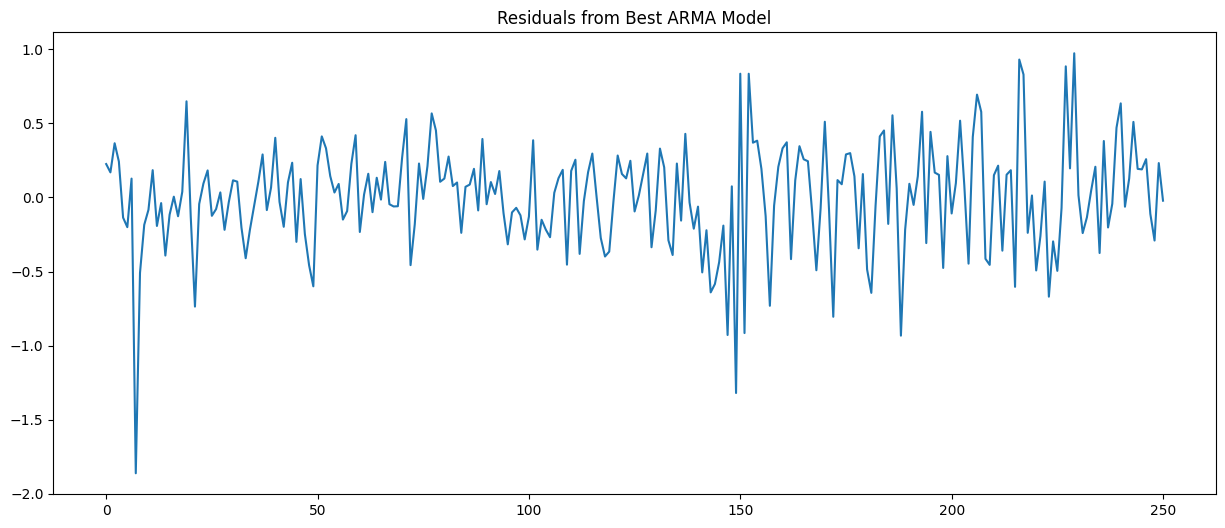

     lb_stat  lb_pvalue
3   1.831631   0.608076
4   1.889115   0.756144
5   3.437859   0.632810
6   3.602247   0.730320
7   3.619728   0.822386
8   4.178515   0.840669
9   4.397917   0.883328
10  8.273797   0.602112


In [33]:
plt.figure(figsize=(15, 6))
plt.plot(model1.resid)
plt.title('Residuals from Best ARMA Model')
plt.show()

# Ljung-Box 
Ljung_Box = sm.stats.acorr_ljungbox(model1.resid, lags=[3,4,5,6,7,8,9,10], return_df=True)
print(Ljung_Box)


#### (h) Forecast MRK stock prices in January, 2012. Compare your predicted prices with real prices in the data.

In [38]:
data[250:]

,Date,Open,High,Low,Close,Adj Close,Volume,delta_y,Log_return
250,2011-12-30,37.590000,37.869999,37.470001,37.700001,30.079931,7859900,-0.023932,-0.000795
251,2012-01-03,37.880001,38.560001,37.810001,38.299999,30.558653,17271400,0.478722,0.015790
252,2012-01-04,38.250000,38.340000,37.900002,38.340000,30.590559,13716300,0.031906,0.001044
253,2012-01-05,38.139999,39.000000,38.040001,38.740002,30.909727,20987600,0.319168,0.010379
254,2012-01-06,38.750000,38.750000,38.430000,38.470001,30.694302,16727700,-0.215425,-0.006994
255,2012-01-09,38.340000,38.470001,37.889999,38.389999,30.630465,13906900,-0.063837,-0.002082
256,2012-01-10,38.750000,38.799999,38.400002,38.520000,30.734186,11366200,0.103721,0.003380
257,2012-01-11,38.419998,38.520000,38.240002,38.410000,30.646421,11945800,-0.087765,-0.002860
258,2012-01-12,38.619999,38.680000,38.419998,38.610001,30.805992,9931200,0.159571,0.005193
259,2012-01-13,38.450001,38.500000,38.020000,38.320000,30.574608,9677400,-0.231384,-0.007539


In [41]:
ts = data['delta_y'].reset_index(drop = True)
p = 1
q = 1
rolling_predictions = []
t_list = []
predict_start = 251 
predict_end   = 270
for t in range(predict_start, predict_end):  
    model = sm.tsa.ARIMA(ts[:t], order=(p, 0, q)).fit()  
    y_pred = model.forecast(steps = 1).reset_index(drop = True)[0]
    rolling_predictions.append(y_pred)
    t_list.append(t)
prediction_df = pd.DataFrame({'delta_y_pred': rolling_predictions},index = t_list) 

In [42]:
prediction_result = pd.merge(data, prediction_df, left_index = True, right_index = True, how = 'outer')

prediction_result = prediction_result.dropna()

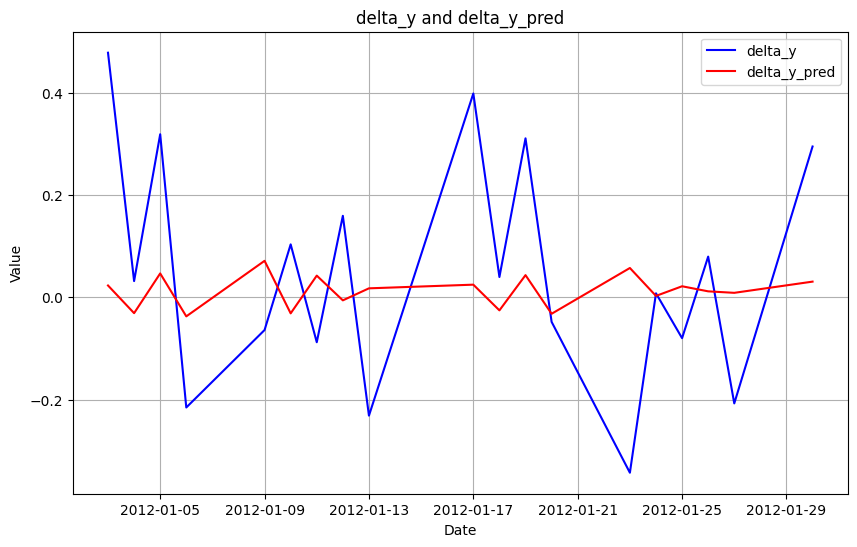

In [44]:
plt.figure(figsize=(10,6))
plt.plot(prediction_result.Date, prediction_result['delta_y'], label='delta_y', color='blue')
plt.plot(prediction_result.Date, prediction_result['delta_y_pred'], label='delta_y_pred', color='red')
plt.title('delta_y and delta_y_pred')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()